In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns

In [21]:
train_data = pd.read_csv("banana_quality.csv")
train_data


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [22]:
train_data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [23]:
train_data.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [24]:
train_data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


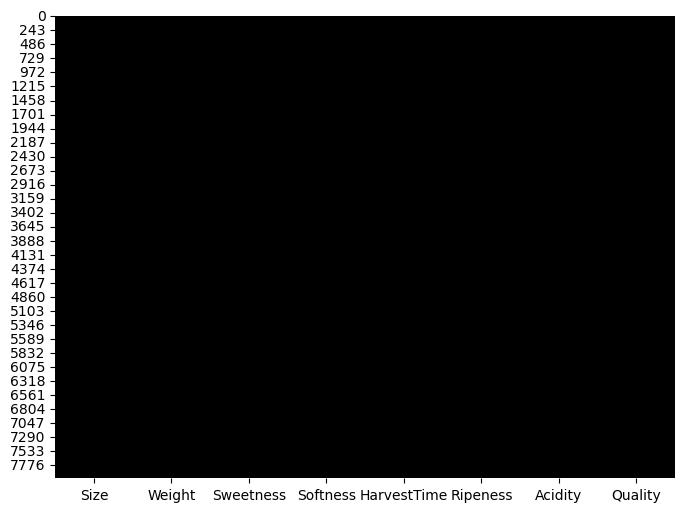

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),cbar=False,cmap="binary_r")
plt.show()

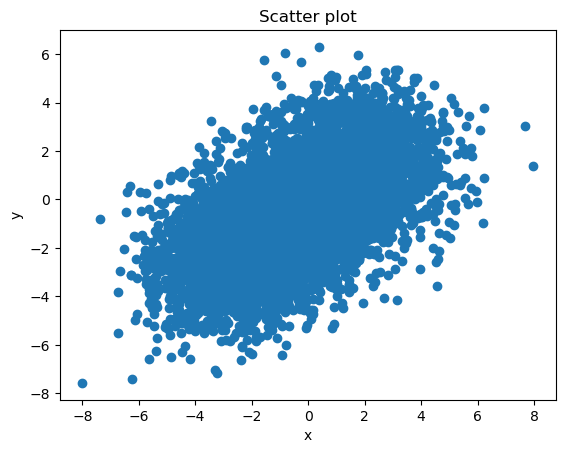

In [26]:
plt.scatter(train_data["Size"],train_data["HarvestTime"])
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

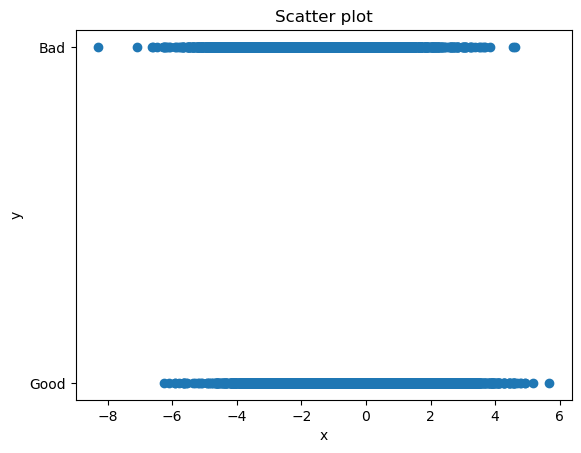

In [27]:
plt.scatter(train_data["Weight"],train_data["Quality"])
plt.title("Scatter plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

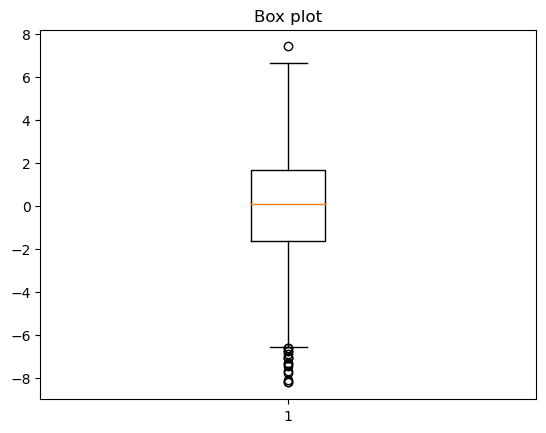

In [31]:
plt.boxplot(train_data['Acidity'])
plt.title('Box plot')
plt.show()

In [34]:
for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
# Assuming data is your DataFrame and 'column_name' is the column for which you want to check outliers
    Q1 = train_data[column_name].quantile(0.25)
    Q3 = train_data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the number of outliers
    outliers = train_data[(train_data[column_name] < lower_bound) |
                    (train_data[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f'There are {num_outliers} outliers.')
    train_data[f'Adjusted_{column_name}'] = np.where((train_data[column_name] < lower_bound) | (
    train_data[column_name] > upper_bound), np.nan, train_data[column_name])

# Calculate the mean of the non-outlier values
    mean = train_data[f'Adjusted_{column_name}'].mean()

# Replace the NaNs in the 'Adjusted' column with the mean
    train_data[f'Adjusted_{column_name}'].fillna(mean, inplace=True)
    train_data = train_data.drop(columns=column_name, axis = 1)

There are 3 outliers.
There are 36 outliers.
There are 178 outliers.
There are 58 outliers.
There are 17 outliers.
